### IDs:
Insert yours IDs to the cell below

ID #1:305073330

ID #2:204710156


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

%matplotlib inline

First, we will load the dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_data = pd.DataFrame(boston.data)
boston_data.columns = boston.feature_names
boston_data['MEDV'] = boston.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?

In [13]:
boston_data.info()
print("\nThe dataset has 506 sampels, 14 features (including the target feature MEDV), all of them 'float64'\n'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB

The dataset has 506 sampels, 14 features (including the target feature MEDV), all of them 'float64'
'


The description for the database:

Each of the 506 rows in the data set describes a boston town, and it contain 14 features with information about the town like avg number of rooms per dwelling, and per capita crime rate. MEDV feature describes the median price of owner-occupied homes and it usually the row for prediction.

In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.

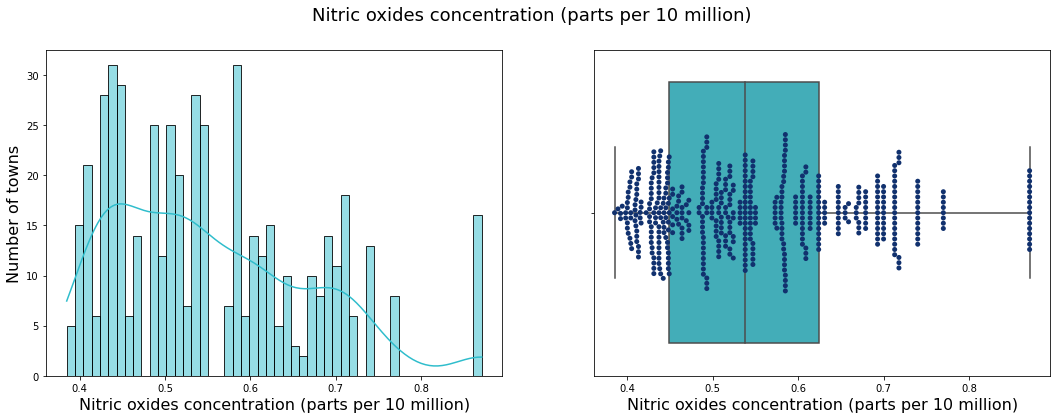

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
fig.suptitle('Nitric oxides concentration (parts per 10 million)', fontsize=18)

sns.histplot(x='NOX', ax=ax[0], bins=50, kde=True, data=boston_data, color="#2FBDCC")
ax[0].set_xlabel('Nitric oxides concentration (parts per 10 million)', size=16)
ax[0].set_ylabel('Number of towns', size=16)

sns.boxplot(x='NOX', ax=ax[1], data=boston_data, color="#2FBDCC")
sns.swarmplot(x="NOX", ax=ax[1], data=boston_data, color="#11316E")
ax[1].set_xlabel('Nitric oxides concentration (parts per 10 million)', size=16)
plt.show()



From both plots we observe that most of the data is between 0.4 to 0.73, which means that most houses contain nitric oxides concentration between those values.
In fact, from the Boxplot we know the IQR of the distribution is around 0.44 to 0.62.
In addition, there might be an outlier with value around 0.88 (16 houses). We need to keep it in mind for our further calculations.

3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

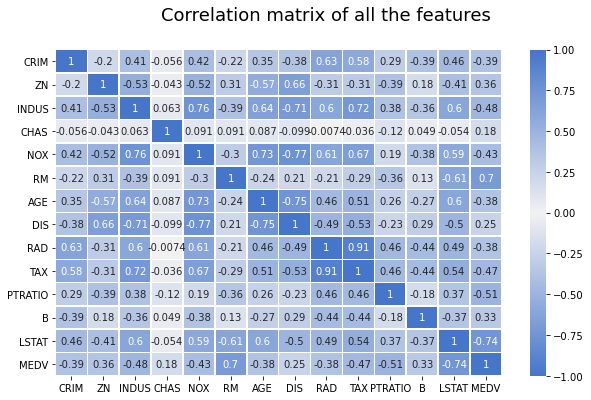

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Correlation matrix of all the features', fontsize=18)

cmap = sns.diverging_palette(255,255, as_cmap=True)
sns.heatmap(boston_data.corr(), annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
plt.show()

There are some correlated features. The most significant one, with correlation of 0.91 is RAD(accessibility to radial highways) and TAX(tax rate).<br>
Another correlated features (positive/negative, above 0.7) are: DIS & AGE, DIS & NOX, AGE & NOX, TAX & INDUS, DIS & INDUS, NOX & INDUS, MEDV & LSTAT.<br>
The feature with unusual behaviour is CHAS, which is Charles River dummy variable (= 1 if tract bounds river and 0 otherwise).<br> Since it's a dummy variable the correlations of all features with this one are almost zero.  


4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 

Text(0.5, 1.08, 'Correlation between DIS and NOX')

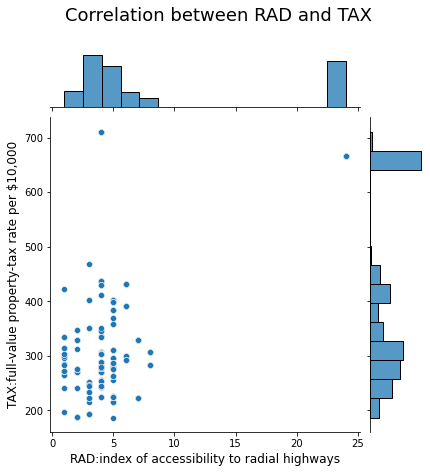

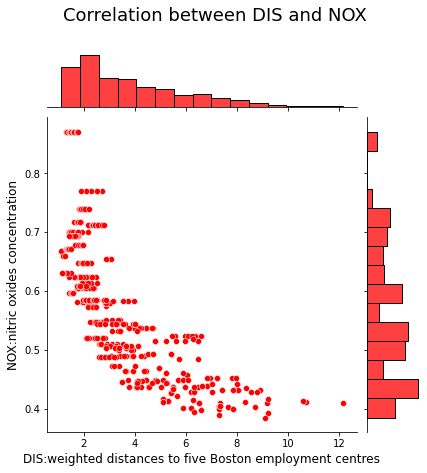

In [16]:
ax1 = sns.jointplot(data=boston_data, x='RAD', y='TAX', kind="scatter", marginal_kws=dict(bins=15))
ax1.set_axis_labels('RAD:index of accessibility to radial highways', 'TAX:full-value property-tax rate per $10,000', fontsize=12)
ax1.fig.suptitle("Correlation between RAD and TAX", y=1.08, fontsize=18)

ax2 = sns.jointplot(data=boston_data, x='DIS', y='NOX', kind="scatter", marginal_kws=dict(bins=15), color='r')
ax2.set_axis_labels('DIS:weighted distances to five Boston employment centres', 'NOX:nitric oxides concentration', fontsize=12)
ax2.fig.suptitle("Correlation between DIS and NOX", y=1.08, fontsize=18)


5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)


Text(85, 390, 'Q3=age 94')

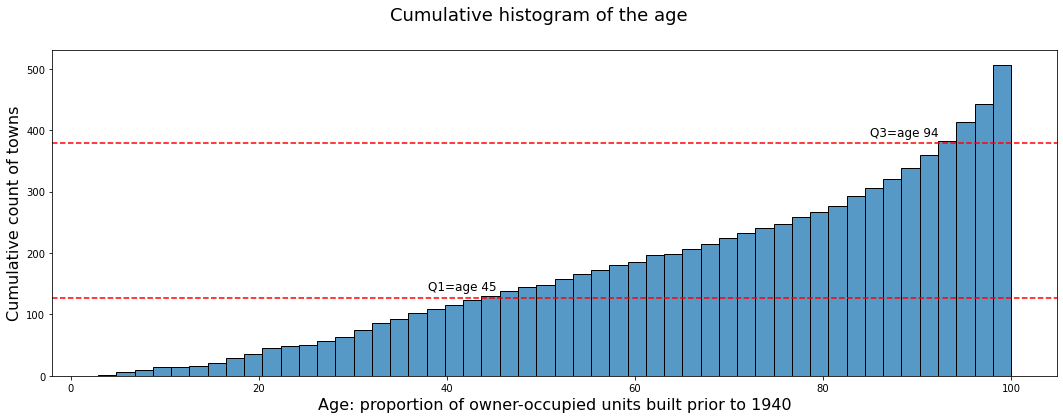

In [4]:
count = len(boston_data['AGE'])

fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle('Cumulative histogram of the age', fontsize=18)

sns.histplot(x='AGE', bins=50, cumulative=True, data=boston_data)
ax.set_xlabel('Age: proportion of owner-occupied units built prior to 1940', size=16) 
ax.set_ylabel('Cumulative count of towns', size=16)
plt.axhline(count/4, color='r', linestyle='--')
plt.axhline(count*3/4, color='r', linestyle='--')
plt.text(38,140,'Q1=age 45', fontsize=12)
plt.text(85,390,'Q3=age 94', fontsize=12)

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

#### Answer:
From the correlation matrix we observe that LSTAT (%lower status of the population) has positive correlation with AGE (proportion of owner-occupied units built prior to 1940) which make sense, since the population living in old buildings is more likely to be poor.<br>
On the other side LSTAT has negative correlation with RM (average number of rooms per dwelling) which also make sense, since population living in bigger units is less likely to be poor.<br>
We will illustrate this in the graphs below:

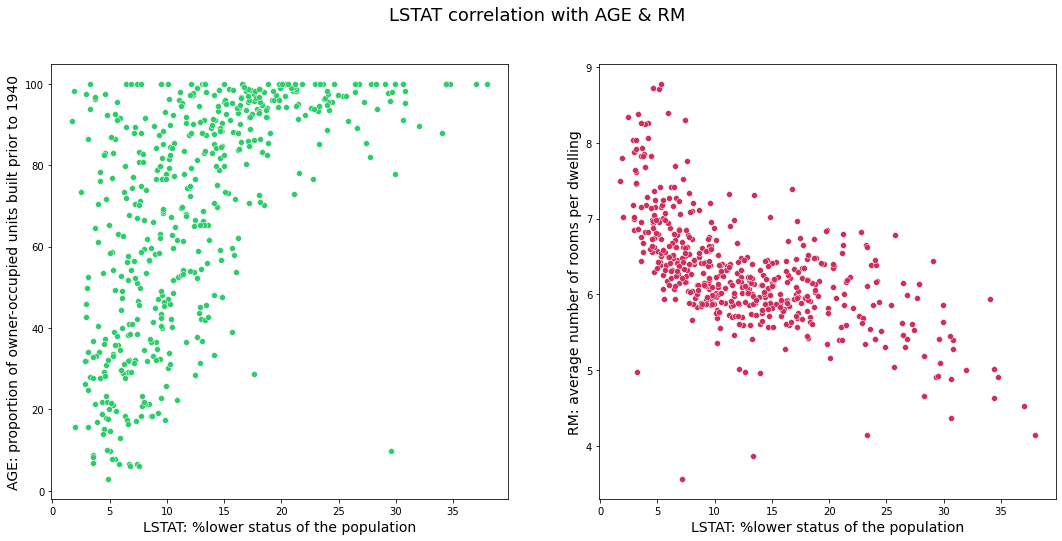

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle('LSTAT correlation with AGE & RM', fontsize=18)

sns.scatterplot(x='LSTAT',y='AGE', ax=ax[0], color='#2FCC6C', data=boston_data)
ax[0].set_xlabel('LSTAT: %lower status of the population', size=14) 
ax[0].set_ylabel('AGE: proportion of owner-occupied units built prior to 1940', size=14)

sns.scatterplot(x='LSTAT',y='RM', ax=ax[1], color='#CC2F5C', data=boston_data)
ax[1].set_xlabel('LSTAT: %lower status of the population', size=14) 
ax[1].set_ylabel('RM: average number of rooms per dwelling', size=14)
plt.show()

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

#### Answer:

No, every 3d multivariate gaussian that is pairwise-independent is collectivley independent.\
We will need to proof that $$P(X=x_1, Y=x_2, Z=x_3)=P(X=x_1)\cdot P(Y=x_2)\cdot P(Z=x_3)$$

The multivariate Gaussian distribution of a 3-dimensional vector $x=(x_1,x_2,x_3)$ may be written as: 
$$P(X=x_1, Y=x_2, Z=x_3)=f(x_1,x_2,x_3)=\frac{1}{\sqrt{(2\pi)^3\cdot \det(\Sigma)}}{e^{(-\frac{1}{2}\cdot (\vec{x}-\vec{\mu})^t\cdot \Sigma ^{-1} \cdot (\vec{x}-\vec{\mu}))}}$$
Since the function is pairwise independence:
$$\Sigma = \begin{bmatrix}
\sigma_1^2 & 0 & 0\\
0 & \sigma_2^2 & 0\\
0 & 0 & \sigma_3^2
\end{bmatrix}$$ , $$\det(\Sigma)=\sigma_1^2\cdot \sigma_2^2\cdot \sigma_3^2$$


So:

$$\begin{equation}
\begin{split}
-\frac{1}{2}(\vec{x}-\vec{\mu})\cdot\Sigma^{-1}\cdot (\vec{x}-\vec{\mu}) = \begin{pmatrix}
x_1-\mu_1\\
x_2-\mu_2\\
x_3-\mu_3
\end{pmatrix}^T\cdot \begin{bmatrix}
\frac{1}{\sigma_1^2} & 0 & 0\\
0 & \frac{1}{\sigma_2^2} & 0\\
0 & 0 & \frac{1}{\sigma_3^2}
\end{bmatrix}\cdot \begin{pmatrix}
x_1-\mu_1\\
x_2-\mu_2\\
x_3-\mu_3
\end{pmatrix} 
& = -\frac{(x_1-\mu_1)^2}{2\sigma_1^2}-\frac{(x_2-\mu_2)^2}{2\sigma_2^2}-\frac{(x_3-\mu_3)^2}{2\sigma_3^2}
\end{split}
\end{equation}$$

So:

$$\begin{equation}
\begin{split}
\frac{1}{\sqrt{(2\pi)^3\cdot \det(\Sigma)}}{e^{(-\frac{1}{2}\cdot (\vec{x}-\vec{\mu})^t\cdot \Sigma ^{-1} \cdot (\vec{x}-\vec{\mu}))}}\\
& = \frac{e^{(-\frac{(x_1-\mu_1)^2}{2\sigma_1^2}-\frac{(x_2-\mu_2)^2}{2\sigma_2^2}-\frac{(x_3-\mu_3)^2}{2\sigma_3^2})}}{\sqrt{(2\pi)^3\cdot \sigma_1^2\cdot \sigma_2^2\cdot \sigma_3^2}}\\
& = \frac{e^{-\frac{(x_1-\mu_1)^2}{2\sigma_1^2}}}{\sqrt{(2\pi)\sigma_1^2}}\cdot \frac{e^{-\frac{(x_2-\mu_2)^2}{2\sigma_2^2}}}{\sqrt{(2\pi)\sigma_2^2}}\cdot \frac{e^{-\frac{(x_3-\mu_3)^2}{2\sigma_3^2}}}{\sqrt{(2\pi)\sigma_3^2}}\\
& = P(X=x_1)\cdot P(Y=x_2)\cdot P(Z=x_3)
\end{split}
\end{equation}$$

Therefore, the distribution is collectivley independent.

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### Answer:

If X , Y and Z are 3 discrete random variables, we define the joint probability function of X , Y and Z by:\
$P(X=x,Y=y,Z=z)=f(x,y,z)$ where:
1. $$f(x,y,z)\geq 0$$
2. $$\sum_{x} \sum_{y} \sum_{z} f(x,y,z) = 1$$

We can treat the joint distribution as a 3-dimensional table.\
Filling the table will define the distribution completely.\
In order to fill the table we will need all $n\cdot m\cdot k$ possible parameters but 1.\
We use the fact that all the parameters have to sum to 1, in order to calculate the last parameter.

So - we will need $n\cdot m\cdot k - 1$ to define the joint distribution of X, Y and Z.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### Answer:

If X, Y and Z are independent, we know that:
$$\sum_{x} f_x(x) = \sum_{y} f_y(y) = \sum_{z} f_z(z) = 1$$

We can use this to calculate the $n^\text{th}$, $m^\text{th}$ and $k^\text{th}$ parameter in X, Y and Z respectivley, using only (n-1), (m-1) and (k-1) parameters respectivley.

So - we will need $(n-1) + (m-1) + (k-1) = n + m + k -3$ parameters to define the joint distribution of X, Y and Z.

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### Answer:

We can use the conditional independenecy of X and Y in order to define each distribution with only $n-1$ and $m-1$ parameters respectivley.
After that we will need to multiply it with all $k$ options.
Also here, we can use 1 less parameter because the joint distribution sums to 1.
So, the number of parameters that define's the joint distribution of X, Y and Z are:
$$k\cdot[(n-1) + (m-1)] - 1$$

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

#### Answer:

We take 2 coins with probabilities p and q of obtaining Heads respectively.\
Let Z be the distribution of the choice of 1 of the 2 coins (2 possible outcomes - coin 1 or coin 2). the probability of chosing the coin 1 is r.\
The chosen coin will be flipped twice.\
Let X be the distribution of the result of flipping the chosen coin for the first time (2 possible outcomes - Heads or Tails).\
Let Y be the distribution of the result of flipping the chosen coin for the second time (2 possible outcomes - Heads or Tails).

Note that X and Y are conditionaly independent given  𝑍.

The joint distribution can be minimally defined by $k\cdot[(n-1) + (m-1)]-1 = 2\cdot[(2-1) + (2-1)]-1 = 2\cdot2-1=3$ parameters.

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

,index,value
0,0,3.575253
1,1,4.105491
2,2,3.903642
3,3,4.472249
4,4,4.297265


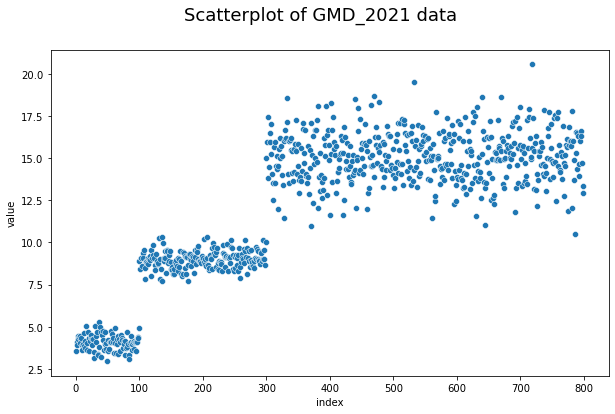

In [19]:
#save the data from csv
df_gmd = pd.read_csv('GMD_2021.csv', header=None, names=["index","value"])  
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Scatterplot of GMD_2021 data', fontsize=18)
sns.scatterplot(x="index" ,y="value", data=df_gmd)
df_gmd.head()

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### First way of estimating - Gaussian mixture model with EM

In [21]:
values = df_gmd['value'].values.reshape(-1,1)

#initiate the parameters with the given parameters and make a guess for those we don't know
weights = [0.2, 0.25, 0.55]
means = [4, 9, 14]
sigmas = [0.5, 0.5, 1.5]

sum_val_dot_res = 0

weight_per_val = np.zeros(3)
responsibility = np.zeros((3, 800))

for x in range(50):
    
    #E-Step
    for i in range (len(values)):
        weight_per_val[0] = weights[0]*stats.norm.pdf(x=values[i], loc=means[0], scale=sigmas[0])
        weight_per_val[1] = weights[1]*stats.norm.pdf(x=values[i], loc=means[1], scale=sigmas[1])
        weight_per_val[2] = weights[2]*stats.norm.pdf(x=values[i], loc=means[2], scale=sigmas[2])
        sum_weights_per_val = weight_per_val[0] + weight_per_val[1] + weight_per_val[2]
        responsibility[0][i] = weight_per_val[0]/sum_weights_per_val
        responsibility[1][i] = weight_per_val[1]/sum_weights_per_val
        responsibility[2][i] = weight_per_val[2]/sum_weights_per_val
        
    #M-Step
    weights[0] = sum(responsibility[0])/len(values)
    weights[2] = sum(responsibility[2])/len(values)
    
    #normalize weights[0]+weights[2] to be exactly equal to 0.75
    weights[0] = weights[0] - (weights[0]+weights[2]-0.75)*(weights[0]/(weights[0]+weights[2]))
    weights[2] = weights[2] - (weights[0]+weights[2]-0.75)*(weights[2]/(weights[0]+weights[2]))
    
    
    for j in range (len(values)):
        sum_val_dot_res += values[j]*responsibility[2][j]    
    means[2] = sum_val_dot_res/(len(values)*weights[2])
    sum_val_dot_res = 0
        
#print the final parameters
print('The first mean is = {}\nThe second mean is = {}\nThe third mean is = {}\n'.format(means[0], means[1], round(means[2][0],3)))
print('The first sigma is = {}\nThe second sigma is = {}\nThe third sigma is = {}\n'.format(sigmas[0], sigmas[1], sigmas[2]))
print('The first weight is = {}\nThe second weight is = {}\nThe third weight is = {}\n'.format(round(weights[0],3), weights[1], round(weights[2],3)))


The first mean is = 4
The second mean is = 9
The third mean is = 15.104

The first sigma is = 0.5
The second sigma is = 0.5
The third sigma is = 1.5

The first weight is = 0.125
The second weight is = 0.25
The third weight is = 0.625



In [ ]:
#estimate the parameters in the same way but by function "GaussianMixture" from sklearn 
#we decided to not use thic method since it slightly change the given parameters
"""
from sklearn.mixture import GaussianMixture

values = df_gmd['value'].values.reshape(-1,1)

#initiate the parameters with the given parameters and make a guess for those we don't know
weights = [0.2, 0.25, 0.55]
means = [[4], [9], [14]]
precisions = [[[1/0.5**2]], [[1/0.5**2]], [[1/1.5**2]]]

#use GaussianMixture function for estimate all the parameters
em_gmm = GaussianMixture(n_components=3, weights_init=weights, means_init=means, precisions_init=precisions).fit(values)

#print the final parameters
print('The first mean is = {}\nThe second mean is = {}\nThe third mean is = {}\n'.format(4, 9, round(em_gmm.means_[2][0],3)))
print('The first sigma is = {}\nThe second sigma is = {}\nThe third sigma is = {}\n'.format(0.5, 0.5, 1.5))
print('The first weight is = {}\nThe second weight is = {}\nThe third weight is = {}\n'.format(round(em_gmm.weights_[0],3), round(em_gmm.weights_[1],3), round(em_gmm.weights_[2],3)))
"""

#### Second way of estimating - Solve by the equations of expectation and variance:

We already proved in class the equations of expectation and variance of GMM.<br>
From the parameters given above, we have 3 missing variables - $w1, w3, \mu3$.<br>
So, we need to solve 3 equations with 3 missing variables.<br>
The equations are:<br>
    1. $w1 = 0.75-w3$   - total of all 3 weights is 1<br>
    2. $E(x)=\sum_{i=1}^{i=3}w_iE(x_i)$   - expectation of the 3 gaussians<br>
    3. $V(x)=\sum_{i=1}^{i=3}w_iE((X_i-\mu_i)^2)+\sum_{i=1}^{i=3}w_iE(\mu_i-\mu)^2$   - variance of the 3 gaussians<br>

In [22]:
#Now, we will solve those 3 equations:
from scipy.optimize import fsolve

values = df_gmd['value'].values.reshape(-1,1)

tm = np.mean(values)
tv = np.var(values)

def f(x):
    y = np.zeros(np.size(x))
    y[0] = 0.75-x[0]-x[1]
    y[1] = x[0]*4+0.25*9+x[1]*x[2]-tm
    y[2] = x[0]*0.25+0.25*0.25+x[1]*2.25+x[0]*((4-tm)**2)+0.25*((9-tm)**2)+x[1]*((x[2]-tm)**2)-tv
    return y

x0 = np.array([1.0, 1.0, 1.0])
x = fsolve(f, x0)

print('The first mean is = {}\nThe second mean is = {}\nThe third mean is = {}\n'.format(4, 9, round(x[2],3)))
print('The first sigma is = {}\nThe second sigma is = {}\nThe third sigma is = {}\n'.format(0.5, 0.5, 1.5))
print('The first weight is = {}\nThe second weight is = {}\nThe third weight is = {}\n'.format(round(x[0],3), 0.25, round(x[1],3)))

The first mean is = 4
The second mean is = 9
The third mean is = 15.086

The first sigma is = 0.5
The second sigma is = 0.5
The third sigma is = 1.5

The first weight is = 0.123
The second weight is = 0.25
The third weight is = 0.627



#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

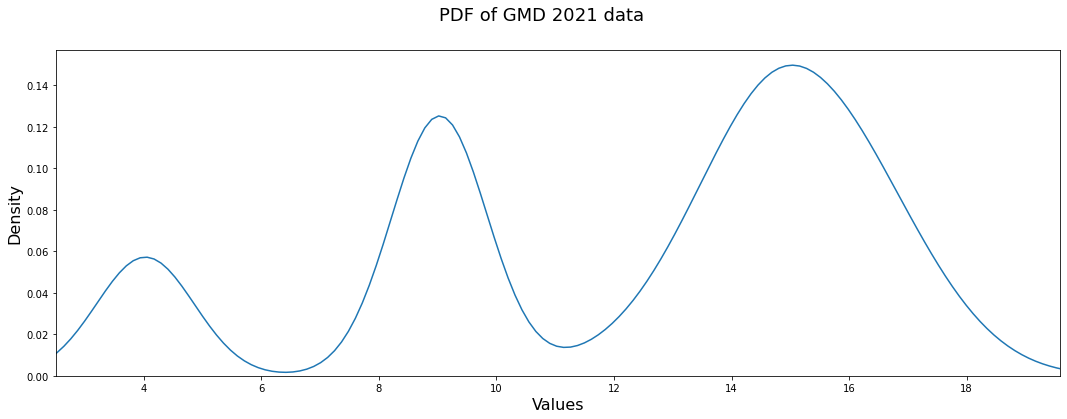

In [23]:
#Create an empty array
gmd2021_data=[]

#Insert the means, sigmas and weights we got on the previous section into arrays
gmd_mean = [4, 9, 15.086]
gmd_sigma = [0.5, 0.5, 1.5]
gmd_weight = [0.123, 0.25, 0.627]

#Generate a lot of samplesּ
for i in range(10000):
    #Randomly choose one of the gaussian distribution proportionally to the weights
    x = stats.uniform.rvs(loc=0, scale=1, size=1)
    #Append each sample value from the chosen distribution to the array
    if (x<gmd_weight[0]):
        gmd2021_data.append(np.random.normal(loc=gmd_mean[0], scale=gmd_sigma[0] ,size=1))
    elif (gmd_weight[0]<=x<(gmd_weight[0]+gmd_weight[1])):
        gmd2021_data.append(np.random.normal(loc=gmd_mean[1], scale=gmd_sigma[1] ,size=1))
    else:
        gmd2021_data.append(np.random.normal(loc=gmd_mean[2], scale=gmd_sigma[2] ,size=1))

gmd2021_df = pd.DataFrame(gmd2021_data)
fig, ax = plt.subplots(figsize=(18,6))
sns.kdeplot(data=gmd2021_df, ax=ax)
fig.suptitle('PDF of GMD 2021 data', fontsize=18)
ax.set_xlabel('Values', size=16)
ax.set_ylabel('Density', size=16)
sigma_gmd = np.std(df_gmd['value'])
mean_gmd = np.mean(df_gmd['value'])
#We chose to set the x-limit between 3 std from the mean of gaussian 1 to 3 std from the mean of gaussian 3  
#Gives cdf of 99.7% of the pdf
plt.xlim(gmd_mean[0]-3*gmd_sigma[0], gmd_mean[2]+3*gmd_sigma[2])
ax.get_legend().remove()


#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, \mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### First way of generating the data:

1. Create an empty array.<br>
2. For each sample in the data (total size $N$):<br>
    a. Randomly choose one of the gaussian distribution proportionally to the weights ($w_1=w_2=w_3=0.33$)<br>
          I. First gaussian center at $\mu_1+3, sigma_1=1$
         II. Second gaussian center at $\mu_2+5, sigma_2=1$
        III. Third gaussian center at $\mu_3+7, sigma_3=1$
    b. Append to the array the sample value of the chosen distribution.
    

#### Second way of generating the data:
1. Create to 3 gaussian distributions with the given parameters.<br>
2. The size of each one of the gaussians is proportionally to their weights ($w_1=w_2=w_3=0.33, \frac{N}{3}$).<br>
3. Concatenate them into one distribution.

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


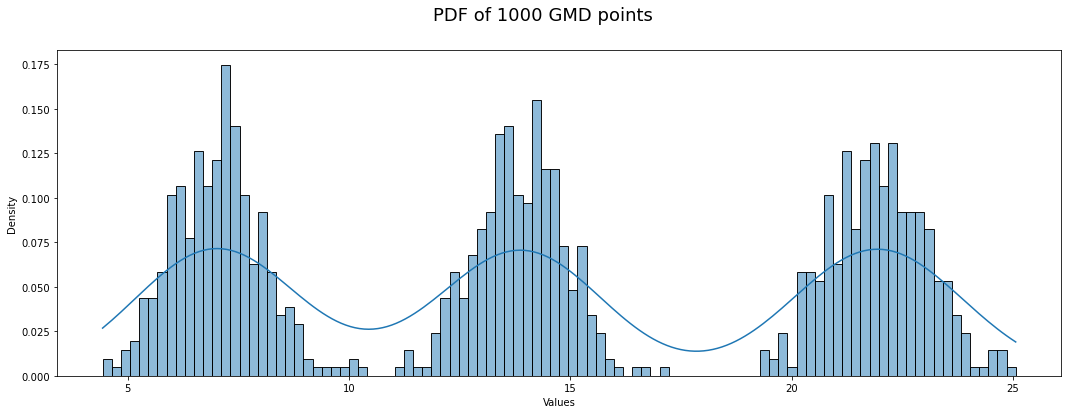

In [24]:
#We will use the first method
#Create an empty array
gmd_data=[]

#For each sample in the data (total size 1000)
for i in range(1000):
    #Randomly choose one of the gaussian distribution proportionally to the weights
    #Append each sample value from the chosen distribution to the array
    x = stats.uniform.rvs(loc=0, scale=1, size=1)
    if (x<1/3):
        gmd_data.append(np.random.normal(loc=(gmd_mean[0]+3), scale=1 ,size=1))
    elif (1/3<=x<2/3):
        gmd_data.append(np.random.normal(loc=(gmd_mean[1]+5), scale=1 ,size=1))
    else:
        gmd_data.append(np.random.normal(loc=(gmd_mean[2]+7), scale=1 ,size=1))

gmd_df = pd.DataFrame(gmd_data)
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=gmd_df, ax=ax, bins=100, stat='density', kde=True)
fig.suptitle('PDF of 1000 GMD points', fontsize=18)
ax.set(xlabel='Values')
ax.get_legend().remove()

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


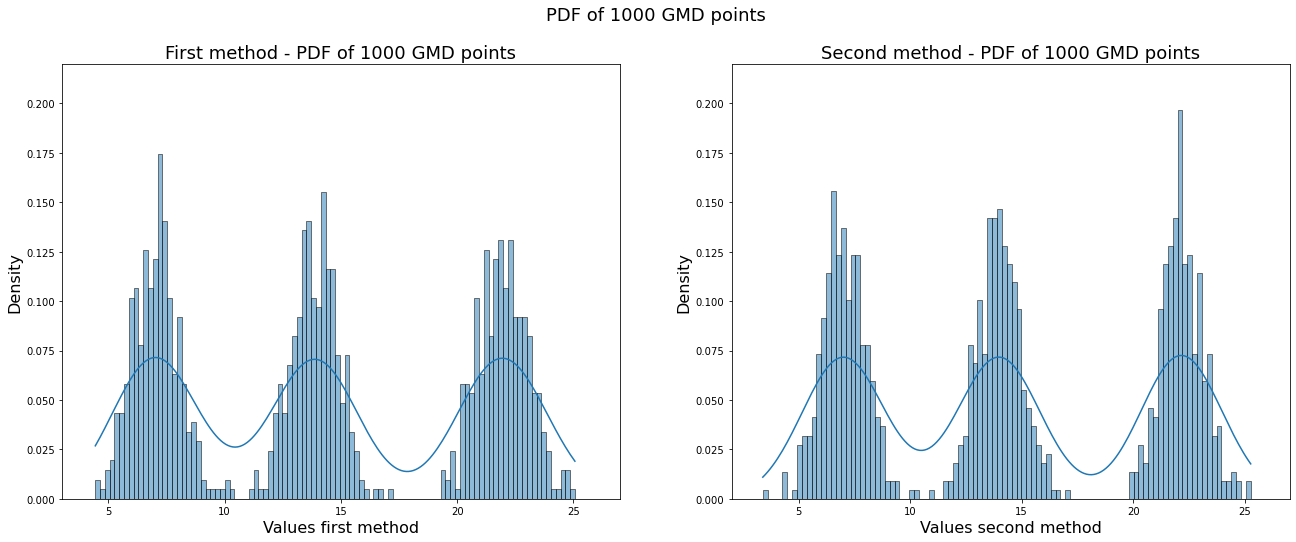

In [25]:
#Second way of generating the data
#Create to 3 gaussian distributions with the given parameters
#The size of each one of the gaussians is proportionally to the weights (1000/3)
gaussian1 = stats.norm.rvs(loc=(gmd_mean[0]+3), scale=1 ,size=334)
gaussian2 = stats.norm.rvs(loc=(gmd_mean[1]+5), scale=1 ,size=333)
gaussian3 = stats.norm.rvs(loc=(gmd_mean[2]+7), scale=1 ,size=333)

#Concatenate into one distribution.
gmd_data2 = np.concatenate((gaussian1, gaussian2, gaussian3))
gmd_df2 = pd.DataFrame(gmd_data2)


#Plot the two methods 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22,8))
sns.histplot(data=gmd_df, ax=ax[0], bins=100, stat='density', kde=True)
fig.suptitle('PDF of 1000 GMD points', fontsize=18)
ax[0].set_title('First method - PDF of 1000 GMD points', size=18)
ax[0].set_xlabel('Values first method', size=16)
ax[0].set_ylabel('Density', size=16)
ax[0].get_legend().remove()
ax[0].set_xlim([3, 27])
ax[0].set_ylim([0, 0.22])

sns.histplot(data=gmd_df2, ax=ax[1], bins=100, stat='density', kde=True, color='r')
ax[1].set_title('Second method - PDF of 1000 GMD points', size=18)
ax[1].set_xlabel('Values second method', size=16)
ax[1].set_ylabel('Density', size=16)
ax[1].get_legend().remove()
ax[1].set_xlim([2, 27])
ax[1].set_ylim([0, 0.22])

plt.show()


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [26]:
under_50k = stats.norm.cdf(50000, loc=70000, scale=30000)
print("{}% of people earn less than 50,000 RCU".format(100*round(under_50k, 4)))

25.25% of people earn less than 50,000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [27]:
under_45k = stats.norm.cdf(45000, loc=70000, scale=30000)
under_65k = stats.norm.cdf(65000, loc=70000, scale=30000)
print("{}% of people earn between 45,000 RCU and 65,000 RCU".format(100*round((under_65k-under_45k), 3)))

23.1% of people earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

#### Answer:<br>
We don't need calculations for this question, since 70K is the median of the distribution, and if so, 50% of the people earn more than 70K.    

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [28]:
more_140k = stats.norm.sf(140000, loc=70000, scale=30000)
print("{} employees in the company expect to earn more than 140,000 RCU".format(round((more_140k*1000), 0)))

10.0 employees in the company expect to earn more than 140,000 RCU


#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

In [29]:
#Calculate the prob of getting mean between 50k to 70k (sample size=50)
z_under_50k = (50000-70000)/(30000/math.sqrt(50))
prob_mean_under_50k = stats.norm.cdf(z_under_50k)
prob_mean_under_70k = stats.norm.cdf(0)
prob_50k_to_70k = prob_mean_under_70k-prob_mean_under_50k

#Calculate binomial distribution for rv x (n=20, p=prob_50k_to_70k) where x>10
x = 1-stats.binom.cdf(10, 20, prob_50k_to_70k)
print("{} = probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU".format(round((x), 3)))

0.412 = probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

#### Answer:
$$
\begin{equation}
\begin{split}
E(T_N) & =\sum_{i=0}^{N-1} E(X_i)\\
& =\sum_{i=0}^{N-1}\frac{N}{N-i}\\
& =N\cdot \sum_{i=1}^{N}\frac{1}{i}\\
\end{split}
\end{equation}$$
So,\
$$E(T_N)=N\cdot H_N$$
Where:\
$$H_N = \sum_{i=1}^{N}\frac{1}{i}$$

In [30]:
def H(N):
    H=1
    for i in range (2 , N+1):
        H+=1/i
    return H

def ET(N):
    ET=N*H(N)
    return ET

#### 5.B
Write code to compute the exact value of $V(T_{N})$

#### Answer:
$$
\begin{equation}
\begin{split}
V(T_N) & =\sum_{i=0}^{N-1} V(X_i)\\
& =\sum_{i=0}^{N-1}\frac{N\cdot i}{(N-i)^2}\\
& =\sum_{i=1}^{N}\frac{N\cdot (N-i)}{i^2}\\
& =N^2 \cdot \sum_{i=1}^{N}\frac{1}{i^2} - N \cdot H_N
\end{split}
\end{equation}$$

In [31]:
def VT(N):
    H2=1
    for i in range (2 , N+1):
        H2+=1/(i**2)
    return N**2*H2-N*H(N)

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

In [32]:
def p_succ(succ_counter, succ_needed, token_left, p_dict):
    if (succ_counter==succ_needed):
        return 1
    if (token_left==0):
        return 0
    if f"succ_counter={succ_counter}, token_left={token_left}" in p_dict:
        return p_dict[f"succ_counter={succ_counter}, token_left={token_left}"]
    p1=((succ_needed-succ_counter)/succ_needed)*p_succ(succ_counter+1,succ_needed,token_left-1,p_dict)
    p2=(1-((succ_needed-succ_counter)/succ_needed))*p_succ(succ_counter,succ_needed,token_left-1,p_dict)
    p_dict[f"succ_counter={succ_counter}, token_left={token_left}"]=p1+p2
    return p1+p2

def p_Tn_larger_then_K (N,K):
    return 1-p_succ(0,N,K,{})

print (p_Tn_larger_then_K(20,40))

0.9641122736925725


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [33]:
def Chebi_bound_Tn_larger_then_K (N,K):
    lamda=abs(K-ET(N))
    return 1-VT(N)/lamda**2


print(Chebi_bound_Tn_larger_then_K (20,40))

0.44520064682904903


By Chebicheff - $\forall \lambda > 0$ , $P(|X-\mu| > \lambda) \leq \frac{V(X)}{\lambda^2}$

So, as calculated above, we can see that the probablity bound by Chebicheff is: $P(T_{{20}}>40)\geq{0.44520064682904903
}$

It is a correct bound but a very 'far' one from the exact answer given by the computing code.